<a href="https://colab.research.google.com/github/LaughBuddha/Deep-Learning---1/blob/master/Gradient_Descent_%2B_Nesterov_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
#Download the dataset
import torchvision as thv
from torchvision import transforms, datasets
train = datasets.MNIST('./', download=True, train=True, transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])) 
val = datasets.MNIST('./', download=True, train=False, transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
print(train.data.shape, len(train.targets))
print(val.data.shape, len(val.targets))

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:01, 7784406.05it/s]                             


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


32768it [00:00, 296811.06it/s]                           
0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


1654784it [00:00, 3947609.42it/s]                            
8192it [00:00, 115553.96it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw
Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!
torch.Size([60000, 28, 28]) 60000
torch.Size([10000, 28, 28]) 10000


In [0]:
train_0 = np.where(train.targets == 0 )
train_0 = np.array(train_0)

train_1 = np.where(train.targets == 1 )
train_1 = np.array(train_1)

test_0 = np.where(val.targets == 0 )
test_0 = np.array(test_0)

test_1 = np.where(val.targets == 1 )
test_1 = np.array(test_1)

train_idx = np.append(train_0, train_1)
test_idx = np.append(test_0, test_1)

X_train = train.data[train_idx].view(-1,784).numpy()
y_train = train.targets[train_idx].view(12665,1).numpy()

X_test = val.data[test_idx].view(-1,784).view(-1,784).numpy()
y_test = val.targets[test_idx].view(2115,1).numpy()

y_train[y_train == 0] = 1
y_train[y_train == 1] = -1

y_test[y_test == 0] = 1
y_test[y_test == 1] = -1

In [0]:
# regularization parameter - lambda
_lambda = 0.001   
# _lambda = 0.1

#learning rate
lr = 0.00001

In [0]:
np.random.seed(42)
w = np.random.randn(1, 784) * 0.01
w0 = np.random.randn((1)) * 0.01

# Save a copy of the same initial W for nesterov's update
w_n = w.copy()
w0_n = w0.copy()

In [0]:
loss = np.empty((20))
count = np.empty((20))


for i in range(20):
  var1 = np.matmul(X_train, w.transpose())
  var2 = np.add(var1, w0)
  var3 = y_train * var2
  var3_5 = np.exp(-var3)
  var4 = np.log(np.add(1, var3_5))
  var5 = var4.sum()

  loss1 = var5 / X_train.shape[0]
  loss2 = ((np.linalg.norm(w))**2 + (np.linalg.norm(w0))**2) * (_lambda / 2)
  loss[i] = float(loss1) + float(loss2)
#   print("loss: ", loss1)
  count[i] = i

  print("update:%d Loss: %.4f" % (i+1, loss[i]))
  
# Calculate derivative
  dw_reg = _lambda * w
  dl_var1 = var3_5 / np.add(1, var3_5)
  dl_var2 = (dl_var1 * -y_train)/X_train.shape[0]
  dl_var3 = np.matmul(dl_var2.T, X_train)
  
  dloss_dw = dl_var3.sum(axis=0) + dw_reg
#   print(np.linalg.norm(dloss_dw))
  
  dw0_reg = _lambda * w0
  dloss_dw0 = dl_var2.sum(axis = 0) + dw0_reg
#   print(dloss_dw0)
  
#update Weights  
  w -= lr*dloss_dw
  w0 -= lr*dloss_dw0

update:1 Loss: 13.5126
update:2 Loss: 7.7289
update:3 Loss: 3.1991
update:4 Loss: 0.9336
update:5 Loss: 0.4764
update:6 Loss: 0.3209
update:7 Loss: 0.2399
update:8 Loss: 0.1902
update:9 Loss: 0.1568
update:10 Loss: 0.1331
update:11 Loss: 0.1153
update:12 Loss: 0.1016
update:13 Loss: 0.0907
update:14 Loss: 0.0819
update:15 Loss: 0.0745
update:16 Loss: 0.0683
update:17 Loss: 0.0630
update:18 Loss: 0.0585
update:19 Loss: 0.0545
update:20 Loss: 0.0510


In [0]:
y_pred = (X_test @ w.T) + w0
y_pred = np.where(y_pred == 1, y_pred, -1)
acc = np.mean(y_pred.squeeze() == y_test)

In [0]:
acc

1.0

**Nesterov's update**

In [0]:
L = 1
m = _lambda

K = L/m
sqrt_K = np.sqrt(K)
rho = (sqrt_K - 1) / (sqrt_K + 1)

In [0]:
# w_n = np.random.randn(1, 784) * 0.01
# w0_n = np.random.randn((1)) * 0.01

x_prev = np.zeros((1, 784))
x0_prev = np.zeros((1))

In [0]:
loss_n = np.empty((20))
count_n = np.empty((20))

for j in range(20):
  var1_n = np.matmul(X_train, w_n.transpose())
  var2_n = np.add(var1_n, w0_n)
  var3_n = y_train * var2_n
  var3_5_n = np.exp(-var3_n)
  var4_n = np.log(np.add(1, var3_5_n))
  var5_n = var4_n.sum()

  loss1_n = var5_n / X_train.shape[0]
  loss2_n = ((np.linalg.norm(w_n))**2 + (w0_n)**2) * (_lambda / 2)
  loss_n[j] = float(loss1_n) + float(loss2_n)
  print("update:%d Loss: %.4f" % (j+1, loss_n[j]))
#   print(loss1_n, loss2_n, loss_n)
#   break
  count_n[j] = j
  
# Calculate derivative
  dw_reg_n = _lambda * w_n
  dl_var1_n = var3_5_n / np.add(1, var3_5_n)
  dl_var2_n = (dl_var1_n * -y_train) / X_train.shape[0]
  dl_var3_n = np.matmul(dl_var2_n.T, X_train)
  
  dloss_dw_n = (dl_var3_n.sum(axis=0)) + dw_reg_n
  
  dw0_reg_n = _lambda * w0_n
  dloss_dw0_n = dl_var2_n.sum(axis = 0) + dw0_reg_n
  
#update Weights - Nesterov
  x = w_n - lr*dloss_dw_n  
  if j == 0:
    w_n = x
  else:
    w_n = ((1 + rho)*x) - (rho*x_prev)
  x_prev = x
  
  x0 = w0_n - lr*dloss_dw0_n
  if j == 0:
    w0_n = x0
  else:
    w0_n = (1 + rho)*x0 - rho*x0_prev
#   print("Weight_0: ", np.linalg.norm(w0_n))
  x0_prev = x0

update:1 Loss: 13.5126
update:2 Loss: 7.7289
update:3 Loss: 0.7123
update:4 Loss: 0.0357
update:5 Loss: 0.0026
update:6 Loss: 0.0002
update:7 Loss: 0.0000
update:8 Loss: 0.0000
update:9 Loss: 0.0000
update:10 Loss: 0.0000
update:11 Loss: 0.0000
update:12 Loss: 0.0000
update:13 Loss: 0.0000
update:14 Loss: 0.0000
update:15 Loss: 0.0000
update:16 Loss: 0.0000
update:17 Loss: 0.0000
update:18 Loss: 0.0000
update:19 Loss: 0.0000
update:20 Loss: 0.0000


Text(0.5, 1.0, 'Loss vs No. of weight updates')

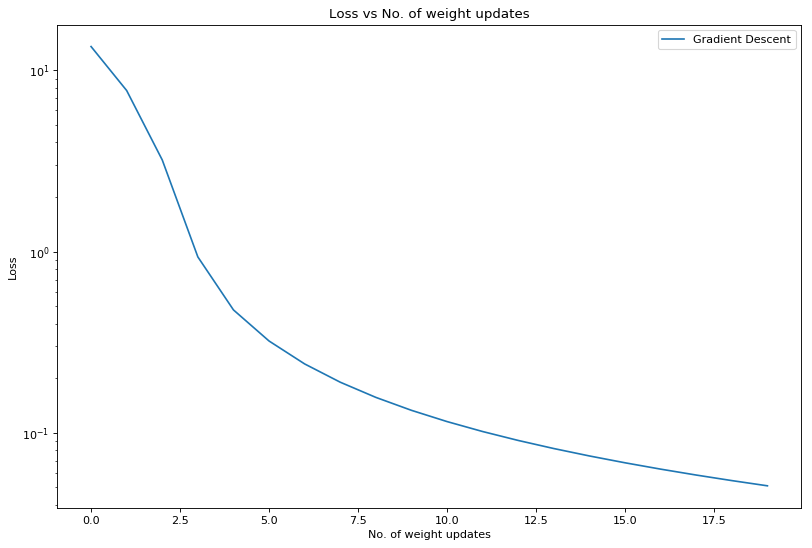

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 8), dpi=80,)
ax.set(yscale="log")
# ax.set_xlim(lr_arr[0], lr_arr[19549])
# ax.set_ylim(np.log(0.000001), np.log(loss_arr[16000]))

plt.plot( loss, label = "Gradient Descent" )
# plt.plot( loss_n, label = "Nesterov Update")
plt.legend()
plt.xlabel("No. of weight updates")
plt.ylabel("Loss")
plt.title("Loss vs No. of weight updates")
